# Import the drive package from google colab to read the data files

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Import all other Python packages as needed

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import h5py
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers

# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Now List the contents of the drive and see the complete path of the data file to read

In [3]:
# List the contents of the drive
listed = drive.ListFile().GetList()
#for file in listed:
  #print('title {}, id {}'.format(file['title'], file['id']))

# Open the file as readonly
h5f = h5py.File('/content/drive/MyDrive/data/SVHN_single_grey1.h5', 'r')

h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# Load the different categories of data

In [4]:
# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

# Print the shape of the datasets

In [5]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", X_train.shape,"and Data Type : ", X_train.dtype)
print("Testing data X-- Shape :", X_test.shape,"and Data Type : ", X_test.dtype)
print("Validation data X-- Shape :", X_val.shape,"and Data Type : ", X_val.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)
print("Validation data y-- Shape :", y_val.shape,"and Data Type : ", y_val.dtype)

Training data X-- Shape : (42000, 32, 32) and Data Type :  float32
Testing data X-- Shape : (18000, 32, 32) and Data Type :  float32
Validation data X-- Shape : (60000, 32, 32) and Data Type :  float32
Training data y-- Shape : (42000,) and Data Type :  uint8
Testing data y-- Shape : (18000,) and Data Type :  uint8
Validation data y-- Shape : (60000,) and Data Type :  uint8


# Visualizing the Dataset

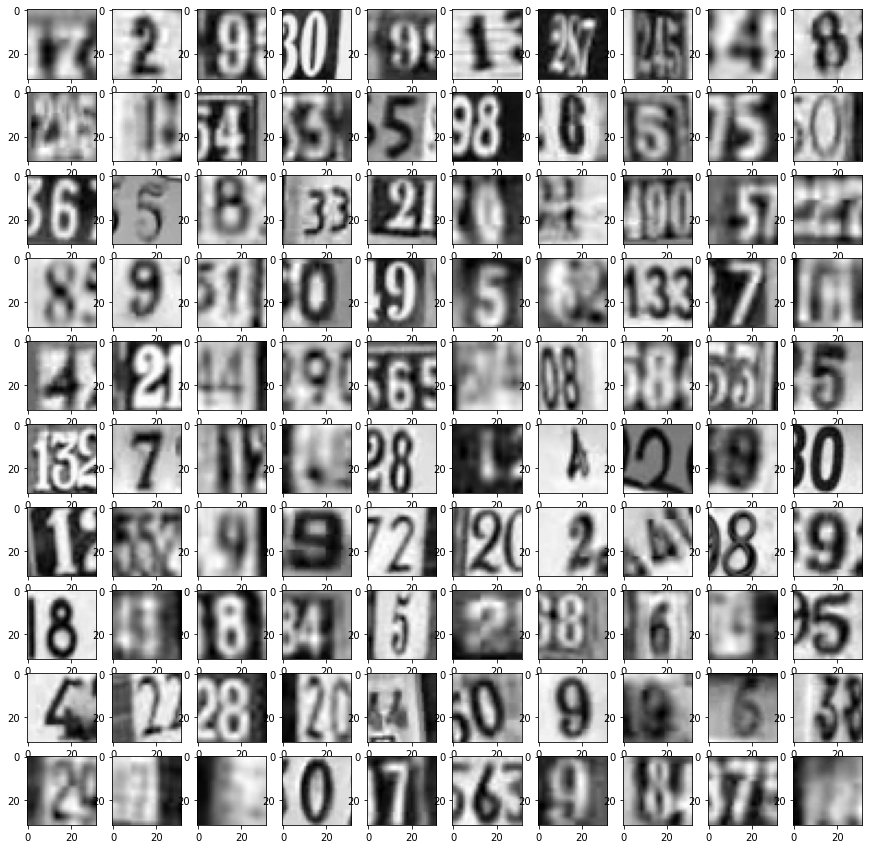

In [6]:
fig=plt.figure(figsize=(15,15))
columns=10
rows=10
for i in range(1, columns*rows+1):
    img=X_test[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

# Visualize the first 10 images in the dataset

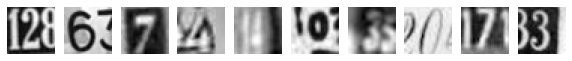

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [7]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32,32),cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

# Implement Deep Neural Network

In [8]:
#Reshape data from 2D to 1D -> 32X32 to 1024
X_train = np.asarray(X_train).reshape(42000,1024)
X_test = np.asarray(X_test).reshape(18000,1024)
X_val = np.asarray(X_val).reshape(60000,1024)

# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

# Convert output label to multiple values

In [9]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(X_train.shape, X_test.shape,X_val.shape, y_train.shape, y_test.shape,y_val.shape)

(42000, 1024) (18000, 1024) (60000, 1024) (42000, 10) (18000, 10) (60000, 10)


# Implement Neural Network

In [10]:
##Initialize the Artificial Neural Network Classifier
keras_model = Sequential()

# Add the necessary layers - one mandatory input, four hidden layers and output

In [11]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digits)
keras_model.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model.add(Activation('softmax'))

In [12]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               524800    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

# Using sgd optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor

In [13]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to Training Data

In [14]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 10s 42ms/step - loss: 2.2891 - accuracy: 0.1324 - val_loss: 2.2641 - val_accuracy: 0.1903
Epoch 2/10
210/210 [==============================] - 6s 30ms/step - loss: 2.2405 - accuracy: 0.2038 - val_loss: 2.2077 - val_accuracy: 0.2393
Epoch 3/10
210/210 [==============================] - 6s 29ms/step - loss: 2.1656 - accuracy: 0.2669 - val_loss: 2.1097 - val_accuracy: 0.3059
Epoch 4/10
210/210 [==============================] - 6s 29ms/step - loss: 2.0470 - accuracy: 0.3253 - val_loss: 1.9371 - val_accuracy: 0.3954
Epoch 5/10
210/210 [==============================] - 6s 30ms/step - loss: 1.9009 - accuracy: 0.3772 - val_loss: 1.7909 - val_accuracy: 0.4373
Epoch 6/10
210/210 [==============================] - 6s 29ms/step - loss: 1.7665 - accuracy: 0.4199 - val_loss: 1.6236 - val_accuracy: 0.4960
Epoch 7/10
210/210 [==============================] - 6s 30ms/step - loss: 1.6424 - accuracy: 0.4642 - val_loss: 1.6052 - val_accuracy: 0.473

# Using adam optimizer and Categorical Crossentropy as loss function and Accuracy as the metric to monitor


In [15]:
# compiling the ANN classifier
keras_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 10, verbose = 1)

Epoch 1/10
210/210 [==============================] - 7s 32ms/step - loss: 1.7187 - accuracy: 0.4239 - val_loss: 1.3416 - val_accuracy: 0.5712
Epoch 2/10
210/210 [==============================] - 6s 30ms/step - loss: 1.2679 - accuracy: 0.5927 - val_loss: 1.1947 - val_accuracy: 0.6078
Epoch 3/10
210/210 [==============================] - 6s 30ms/step - loss: 1.1401 - accuracy: 0.6388 - val_loss: 1.0609 - val_accuracy: 0.6675
Epoch 4/10
210/210 [==============================] - 8s 36ms/step - loss: 1.0268 - accuracy: 0.6817 - val_loss: 0.9901 - val_accuracy: 0.6898
Epoch 5/10
210/210 [==============================] - 6s 31ms/step - loss: 0.9656 - accuracy: 0.6985 - val_loss: 0.9127 - val_accuracy: 0.7165
Epoch 6/10
210/210 [==============================] - 6s 30ms/step - loss: 0.9131 - accuracy: 0.7156 - val_loss: 0.9195 - val_accuracy: 0.7106
Epoch 7/10
210/210 [==============================] - 6s 30ms/step - loss: 0.8550 - accuracy: 0.7343 - val_loss: 0.8051 - val_accuracy: 0.7488

# **As shown above, the accuracy on the model is better in ADAM than SGD Optimizer**

# Let's change the learning rate in SGD Optimizer

In [17]:
#Setting the learning rate in sgd
sgd = optimizers.SGD(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


210/210 [==============================] - 7s 30ms/step - loss: 0.6793 - accuracy: 0.7890 - val_loss: 0.6765 - val_accuracy: 0.7927
Epoch 2/100
210/210 [==============================] - 6s 29ms/step - loss: 0.6440 - accuracy: 0.8022 - val_loss: 0.6632 - val_accuracy: 0.7979
Epoch 3/100
210/210 [==============================] - 6s 30ms/step - loss: 0.6357 - accuracy: 0.8052 - val_loss: 0.6582 - val_accuracy: 0.8006
Epoch 4/100
210/210 [==============================] - 6s 29ms/step - loss: 0.6316 - accuracy: 0.8072 - val_loss: 0.6552 - val_accuracy: 0.8019
Epoch 5/100
210/210 [==============================] - 6s 29ms/step - loss: 0.6289 - accuracy: 0.8084 - val_loss: 0.6530 - val_accuracy: 0.8025
Epoch 6/100
210/210 [==============================] - 6s 29ms/step - loss: 0.6267 - accuracy: 0.8088 - val_loss: 0.6512 - val_accuracy: 0.8029
Epoch 7/100
210/210 [==============================] - 6s 29ms/step - loss: 0.6250 - accuracy: 0.8095 - val_loss: 0.6497 - val_accuracy: 0.8037
Epoc

# Let's plot the graph on accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


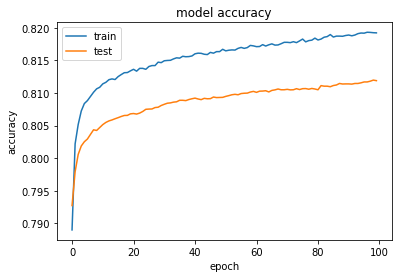

In [18]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Let's print the results of SGD learning rate optimizer

In [19]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN SGD : ', results[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.6223 - accuracy: 0.8119
Val_acc using simple NN SGD :  0.8119000196456909


# Let's save the results

In [20]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val_sgd = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val_sgd = results_on_val_sgd[['Method', 'accuracy']]
results_on_val_sgd

,Method,accuracy
1,NN,0.8119


# Let's change the learning rate in ADAM Optimizer

In [21]:
#Setting the learning rate  and decay in sgd
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history = keras_model.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


210/210 [==============================] - 7s 31ms/step - loss: 0.6106 - accuracy: 0.8135 - val_loss: 0.6263 - val_accuracy: 0.8096
Epoch 2/100
210/210 [==============================] - 7s 31ms/step - loss: 0.5968 - accuracy: 0.8175 - val_loss: 0.6199 - val_accuracy: 0.8108
Epoch 3/100
210/210 [==============================] - 6s 31ms/step - loss: 0.5911 - accuracy: 0.8183 - val_loss: 0.6077 - val_accuracy: 0.8147
Epoch 4/100
210/210 [==============================] - 6s 31ms/step - loss: 0.5828 - accuracy: 0.8210 - val_loss: 0.6148 - val_accuracy: 0.8142
Epoch 5/100
210/210 [==============================] - 6s 31ms/step - loss: 0.5771 - accuracy: 0.8239 - val_loss: 0.5950 - val_accuracy: 0.8184
Epoch 6/100
210/210 [==============================] - 6s 31ms/step - loss: 0.5700 - accuracy: 0.8259 - val_loss: 0.5907 - val_accuracy: 0.8212
Epoch 7/100
210/210 [==============================] - 6s 31ms/step - loss: 0.5643 - accuracy: 0.8266 - val_loss: 0.5855 - val_accuracy: 0.8209
Epoc

# **As shown above, with learning rate of 0.0001, Adam Optimizer shows better performance**

# Let's plot the graph on accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


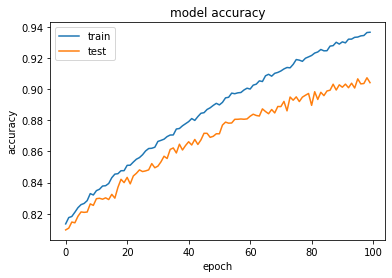

In [22]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Let's print the results

In [23]:
results = keras_model.evaluate(X_val, y_val)
print('Val_acc using simple NN adam : ', results[1])

1875/1875 [==============================] - 8s 4ms/step - loss: 0.3576 - accuracy: 0.9041
Val_acc using simple NN adam :  0.904116690158844


# Store the results

In [24]:
#Store the accuracy results for each model in a dataframe for final comparison
results_on_val_adam = pd.DataFrame({'Method':['NN'], 'accuracy': results[1]},index={'1'})
results_on_val_adam = results_on_val_adam[['Method', 'accuracy']]
results_on_val_adam

,Method,accuracy
1,NN,0.904117


# **As shown above, NN model with Adam Optimizer has performed well with learning rate tuned to 0.0001**

# Implement Batch Normalization

In [25]:
##Initialize the Artificial Neural Network Classifier
keras_model_1 = Sequential()

In [26]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_1.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_1.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_1.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_1.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_1.add(BatchNormalization())
#Adding Activation function
keras_model_1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_1.add(Activation('softmax'))

In [27]:
keras_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_7 (Activation)   (None, 256)              

# Use Adam Optimizer with learning rate 0.0001

In [28]:
#Setting the learning rate 
adam = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_1.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
# Fitting the ANN to the Training data
history_1 = keras_model_1.fit(X_train, y_train, validation_data=(X_val,y_val),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 10s 37ms/step - loss: 2.1510 - accuracy: 0.2593 - val_loss: 2.1025 - val_accuracy: 0.2666
Epoch 2/100
210/210 [==============================] - 7s 34ms/step - loss: 1.6186 - accuracy: 0.4995 - val_loss: 1.6283 - val_accuracy: 0.5062
Epoch 3/100
210/210 [==============================] - 7s 34ms/step - loss: 1.3181 - accuracy: 0.6255 - val_loss: 1.3868 - val_accuracy: 0.6024
Epoch 4/100
210/210 [==============================] - 7s 34ms/step - loss: 1.1161 - accuracy: 0.6928 - val_loss: 1.2214 - val_accuracy: 0.6374
Epoch 5/100
210/210 [==============================] - 7s 34ms/step - loss: 0.9709 - accuracy: 0.7310 - val_loss: 1.1218 - val_accuracy: 0.6640
Epoch 6/100
210/210 [==============================] - 8s 38ms/step - loss: 0.8659 - accuracy: 0.7574 - val_loss: 1.0515 - val_accuracy: 0.6891
Epoch 7/100
210/210 [==============================] - 8s 37ms/step - loss: 0.7842 - accuracy: 0.7789 - val_loss: 0.9938 - val_accuracy

In [30]:
results_1 = keras_model_1.evaluate(X_val, y_val)
print('Val_acc using Batch ANN adam : ', results_1[1])

1875/1875 [==============================] - 13s 7ms/step - loss: 0.8919 - accuracy: 0.8028
Val_acc using Batch ANN adam :  0.8027833104133606


In [33]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['NN_Batch_adam'], 'accuracy': [results_1[1]]},index={'2'})
results_on_val_batch_adm= pd.concat([results_on_val_adam, tempResultsDf])
results_on_val_batch_adm = results_on_val_batch_adm[['Method', 'accuracy']]
results_on_val_batch_adm

,Method,accuracy
1,NN,0.904117
2,NN_Batch_adam,0.802783


# **As shown above, after batch normalization, the accuracy rate has actually gone down**

# Testing NN on test data without using the Batch Normalization

In [34]:
##Initialize the Artificial Neural Network Classifier
keras_model_final = Sequential()

In [35]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_final.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_final.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_final.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_final.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_final.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_final.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model_final.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_final.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classification
keras_model_final.add(Activation('softmax'))

In [36]:
keras_model_final.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)               131328    
                                                                 
 activation_13 (Activation)  (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 activation_14 (Activation)  (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)               

# Let's try the Adam Optimizer

In [37]:
#Setting the learning rate in Adam
sgd = optimizers.Adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [38]:
# Fitting the ANN to the Training data
history_final = keras_model_final.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 200, epochs = 100, verbose = 1)

Epoch 1/100
210/210 [==============================] - 9s 37ms/step - loss: 2.1935 - accuracy: 0.2130 - val_loss: 1.9807 - val_accuracy: 0.3221
Epoch 2/100
210/210 [==============================] - 5s 23ms/step - loss: 1.7871 - accuracy: 0.3953 - val_loss: 1.6496 - val_accuracy: 0.4417
Epoch 3/100
210/210 [==============================] - 5s 23ms/step - loss: 1.5159 - accuracy: 0.5146 - val_loss: 1.4138 - val_accuracy: 0.5502
Epoch 4/100
210/210 [==============================] - 5s 23ms/step - loss: 1.3512 - accuracy: 0.5815 - val_loss: 1.2693 - val_accuracy: 0.6183
Epoch 5/100
210/210 [==============================] - 5s 23ms/step - loss: 1.2279 - accuracy: 0.6288 - val_loss: 1.1707 - val_accuracy: 0.6506
Epoch 6/100
210/210 [==============================] - 5s 23ms/step - loss: 1.1486 - accuracy: 0.6514 - val_loss: 1.1009 - val_accuracy: 0.6724
Epoch 7/100
210/210 [==============================] - 5s 23ms/step - loss: 1.0813 - accuracy: 0.6753 - val_loss: 1.0520 - val_accuracy:

In [39]:
results_final = keras_model_final.evaluate(X_test, y_test)
print('Test accuracy : ', results_final[1])

563/563 [==============================] - 5s 7ms/step - loss: 0.6247 - accuracy: 0.8386
Test accuracy :  0.8386111259460449


# **Predicting the digits using NN classifier on test data**

# Image 1

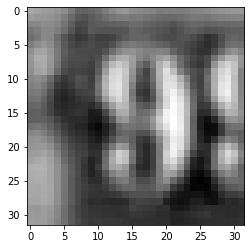

In [40]:
#Showing the image
plt.imshow(X_test[5].reshape(32,32),cmap='gray')

In [49]:
#Predicting the digits
pred = keras_model_final.predict(X_test)[5]
np.argmax(pred)

9

# Image 2

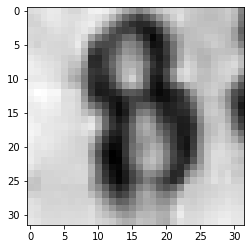

In [50]:
#Showing the image
plt.imshow(X_test[10].reshape(32,32),cmap='gray') 

In [51]:
#Predicting the digits
pred = keras_model_final.predict(X_test)[10]
np.argmax(pred)

8

# Image 3

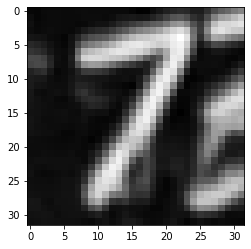

In [53]:
#Showing the image
plt.imshow(X_test[101].reshape(32,32),cmap='gray') 

In [54]:
#Predicting the digits
pred = keras_model_final.predict(X_test)[101]
np.argmax(pred)

7

# **Observations**

# As shown above, NN without batch normalization and using Adam Optimizer with learning rate 0.0001 seems to have provided a good model to predict images